In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
% matplotlib inline

In [3]:
cnsmr_cmplnts = pd.read_csv("complaints_dec_2014.csv")
cnsmr_cmplnts = cnsmr_cmplnts[["Complaint ID", "Product", "Date received", "Company", "Company response"]]

In [4]:
cnsmr_cmplnts.head()

,Complaint ID,Product,Date received,Company,Company response
0,1177167,Debt collection,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation
1,1177166,Debt collection,12/31/2014,"Unique Management Services, Inc",Closed with explanation
2,1177165,Debt collection,12/31/2014,"CL Holdings, LLC",Closed with monetary relief
3,1177164,Debt collection,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief
4,1177163,Debt collection,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation


In [5]:
temp = pd.DatetimeIndex(cnsmr_cmplnts['Date received'])
cnsmr_cmplnts["weekdays"] = temp.weekday

In [6]:
cnsmr_cmplnts["Date_received"] = cnsmr_cmplnts.pop('Date received')
cnsmr_cmplnts.index = pd.to_datetime(cnsmr_cmplnts.pop('Date_received'))

In [8]:
cnsmr_cmplnts.head()

,Complaint ID,Product,Company,Company response,weekdays
Date_received,,,,,
2014-12-31,1177167,Debt collection,Ad Astra Recovery Services Inc,Closed with explanation,2
2014-12-31,1177166,Debt collection,"Unique Management Services, Inc",Closed with explanation,2
2014-12-31,1177165,Debt collection,"CL Holdings, LLC",Closed with monetary relief,2
2014-12-31,1177164,Debt collection,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,2
2014-12-31,1177163,Debt collection,"Enhanced Acquisitions, LLC",Closed with explanation,2


In [9]:
products = cnsmr_cmplnts.groupby("Product").count().sort("Complaint ID", ascending = False)
products = products.T

In [10]:
products

Product,Mortgage,Debt collection,Credit reporting,Bank account or service,Credit card,Consumer loan,Student loan,Payday loan,Money transfers,Prepaid card,Other financial service
Complaint ID,3002,2942,2113,1136,1100,578,340,141,107,70,14
Company,3002,2942,2113,1136,1100,578,340,141,107,70,14
Company response,3002,2942,2113,1136,1100,578,340,141,107,70,14
weekdays,3002,2942,2113,1136,1100,578,340,141,107,70,14


In [11]:
companies = cnsmr_cmplnts.groupby("Company").count().sort("Complaint ID", ascending = False).head(10)
companies = companies.T

In [12]:
companies

Company,Bank of America,Equifax,Experian,TransUnion,Wells Fargo,JPMorgan Chase,Ocwen,Citibank,Nationstar Mortgage,Capital One
Complaint ID,766,737,675,604,598,545,408,403,357,252
Product,766,737,675,604,598,545,408,403,357,252
Company response,766,737,675,604,598,545,408,403,357,252
weekdays,766,737,675,604,598,545,408,403,357,252


In [13]:
company_responses = cnsmr_cmplnts.groupby("Company response").count().sort("Complaint ID", ascending = False)
company_responses = company_responses.T

In [14]:
company_responses

Company response,Closed with explanation,Closed with non-monetary relief,In progress,Closed with monetary relief,Closed,Untimely response
Complaint ID,8185,1253,1056,643,239,167
Product,8185,1253,1056,643,239,167
Company,8185,1253,1056,643,239,167
weekdays,8185,1253,1056,643,239,167


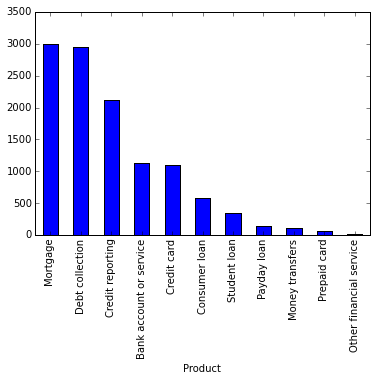

In [15]:
plt.figure();

products.ix[0].plot(kind='bar', sort_columns=True); plt.axhline(0, color='k');

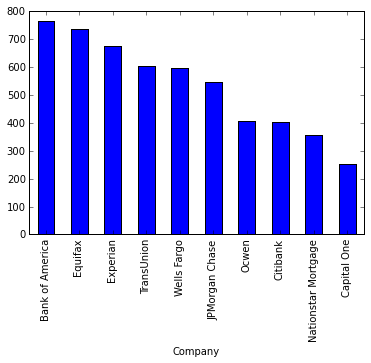

In [16]:
companies.ix[0].plot(kind="bar", sort_columns=True); plt.axhline(0, color='k')

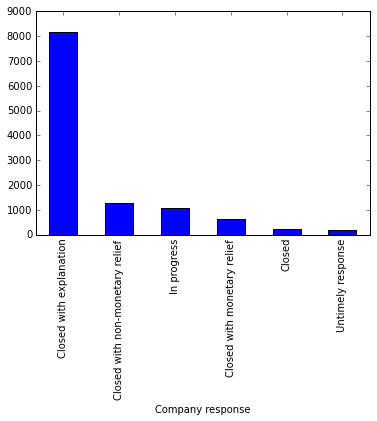

In [17]:
company_responses.ix[0].plot(kind="bar", sort_columns=True); plt.axhline(0, color='k')

In [18]:
mon = cnsmr_cmplnts[cnsmr_cmplnts.weekdays == 0].head()
mon

,Complaint ID,Product,Company,Company response,weekdays
Date_received,,,,,
2014-12-29,1172437,Credit reporting,Experian,In progress,0
2014-12-29,1177539,Consumer loan,Capital One,Closed with explanation,0
2014-12-29,1176340,Consumer loan,American Honda Finance Corporation,Closed with explanation,0
2014-12-29,1176318,Bank account or service,The Huntington National Bank,In progress,0
2014-12-29,1176314,Mortgage,Nationstar Mortgage,Closed with explanation,0


In [24]:
mon.Date_received.unique()

AttributeError: 'DataFrame' object has no attribute 'Date_received'

In [ ]:
tue = cnsmr_cmplnts[cnsmr_cmplnts.weekdays == 1].head()
tue

In [ ]:
wed = cnsmr_cmplnts[cnsmr_cmplnts.weekdays == 2].head()
wed

In [ ]:
thur = cnsmr_cmplnts[cnsmr_cmplnts.weekdays == 3].head()
thur

In [ ]:
fri = cnsmr_cmplnts[cnsmr_cmplnts.weekdays == 4].head()
fri

In [ ]:
sat = cnsmr_cmplnts[cnsmr_cmplnts.weekdays == 5].head()
sat

In [ ]:
sun = cnsmr_cmplnts[cnsmr_cmplnts.weekdays == 6].head()
sun